### Sayan Patra's code:

In [1]:
import matplotlib.pyplot as plt, numpy as np, numpy.random as npr, matplotlib.pyplot as plt
from tqdm import trange
import scipy, pystan as ps
%matplotlib inline
from time import time
from pylab import plot, show, legend

#### Compile Stan model:

In [2]:
sm = ps.StanModel(file="brain_sayan.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cfb0ab3a82b64ceca4fe4d6adfc6b853 NOW.


#### Load data from file and prepare stan data list:

In [3]:
from numpy import loadtxt

X = np.zeros((42,68,68))
for i in range(42) :
    name = "/home/postdoc/dsen/Desktop/projeted_posterior/brain_data/data_column"+str(i+1)
    X[i] = loadtxt(name, comments="#", delimiter=" ", unpack=False)
X = X.astype(int)

# N = 21 
# m = np.shape(X)[1]
# p = 10
# a = 1/m
# data = dict(N=N, m=m, p=p, X=X[:N], alpha=1/m, lmbda=0.5)

N = 21 
m = 68
p = 10
a = 1/m
data = dict(N=N, m=m, p=p, X=X[:N,:m,:m], alpha=1/m, lmbda=0.5)

print(np.mean(X[:N,:m,:m]))

0.3557422969187675


#### Initialise parameters for sampling:

In [4]:
Z_ini = npr.randn(m,m)
pp = np.mean(X[:N,:m,:m],0)
pp[pp==0] = 0.01
pp[pp==1] = 0.99

eg_p = np.linalg.eig(np.log(pp/(1-pp)))
U_ini = eg_p[1][:,:p]
D_ini = np.transpose(np.reshape(np.ravel([np.abs(eg_p[0][:p])]*N), (p,N), order='C'))

etaU_ini= npr.rand(m,p)
sigsqZ_ini = npr.rand()
sigsqD_ini = npr.rand(p)

def initfun():
    return dict(Z=Z_ini, U=U_ini, D=D_ini, etaU=etaU_ini, sigsqZ=sigsqZ_ini, sigsqD=sigsqD_ini)

#### Sample using stan:

In [ ]:
control = dict(max_treedepth=10)
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=5, chains=5, iter=2_000, init=initfun, control=control)
print(round((time()-start)/60,2), "minutes to run")
print(fit)
trace = fit.extract()

#### Plot posterior means of $U$'s:

In [ ]:
plt.plot(np.sort(np.abs(np.mean(trace['U'],0)).flatten()), 'b-')
plt.grid(True)

#### Look at Stan fit:

In [9]:
fit.get_sampler_params()

[OrderedDict([('accept_stat__',
               array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                      4.24363588e-01, 8.38358900e-01, 4.15872998e-01, 1.03488860e-01,
                      9.98805055e-01, 9.09560636e-01, 6.79003367e-01, 6.98786405e-01,
                      6.38022670e-01, 9.39474105e-01, 7.04665830e-01, 5.91517917e-01,
                      9.84425855e-01, 9.32123109e-01, 7.91393049e-01, 2.67203807e-01,
                      9.91913075e-01, 5.90591893e-01, 9.78313725e-01, 3.28043058e-01,
                      8.76570181e-01, 9.40966550e-01, 6.18149749e-01, 8.76404576e-01,
                      5.05724402e-01, 9.73719905e-01, 9.39115592e-01, 5.02000251e-01,
                      8.15032854e-01, 9.97737737e-01, 4.69191197e-01, 8.76017521e-01,
                      7.78953774e-01, 7.31891566e-01, 9.08148483e-01, 7.61744358e-01,
                      3.44832108e-01, 9.10175967e-01, 9.81446986e-01, 8.00986125e-01,
                      

In [11]:
n_samples = np.shape(trace['U'])[0]

In [12]:
np.shape(trace['U'])

(500, 68, 10)

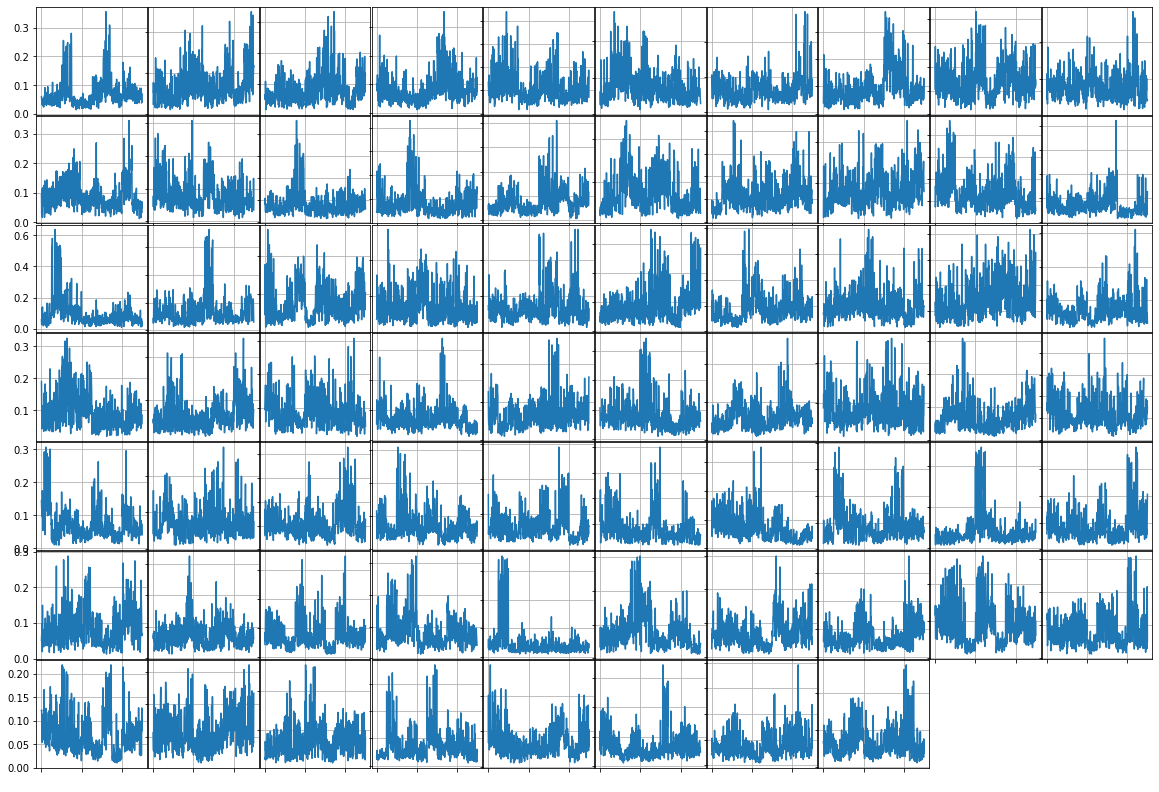

In [13]:
plt.figure(figsize=(20,14))
for i in range(10) :
    for j in range(7) :
        k = 10*j+i
        if k < 68 :
            plt.subplot(7,10,k+1) 
            plt.plot([np.linalg.norm(trace['U'][itr,k,:]) for itr in range(n_samples)])
            plt.grid(True)
            if i > 0 : plt.yticks(alpha=0)
            if j <= 7 : plt.xticks(alpha=0)
            plt.subplots_adjust(wspace=0.01, hspace=0.01)

### Plot spectral norms:

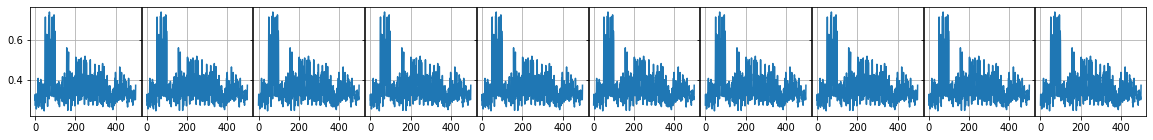

In [14]:
plt.figure(figsize=(20,2))
for i in range(10) :
    plt.subplot(1,10,i+1) 
    plt.plot([np.max(np.linalg.svd(trace['U'][itr])[1]) for itr in range(n_samples)])
    plt.grid(True)
    if i > 0 : plt.yticks(alpha=0)
    plt.subplots_adjust(wspace=0.01)

### Plot posterior means:

<Figure size 1440x720 with 0 Axes>

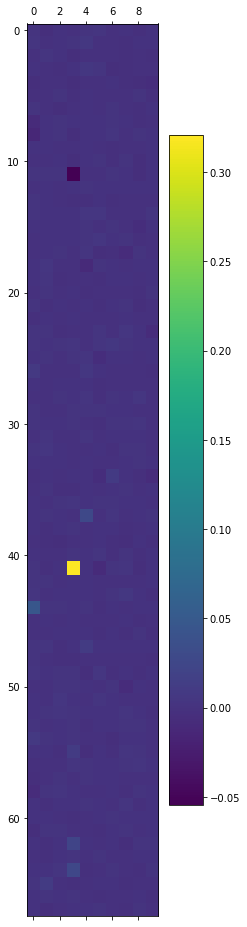

In [35]:
plt.figure(figsize=(20,10))
plt.matshow(np.mean(trace['U'],0));
plt.colorbar();